En la ciudad de Medellín, los accidentes viales representan un desafío significativo para los servicios de emergencia. La ubicación estratégica de ambulancias es crucial para garantizar una respuesta rápida y eficiente. Actualmente, la distribución de ambulancias no siempre permite llegar al lugar de los accidentes en el menor tiempo posible, lo que puede comprometer la atención oportuna a las víctimas.

Para mejorar esta situación, se plantea el siguiente problema: identificar puntos estratégicos para la ubicación de ambulancias que minimicen la distancia recorrida hacia los lugares donde ocurren los accidentes viales.

Se tiene registro de los accidentes viales ocurridos en el año 2021 Fuente.

Cada fila representa un accidente, el data set cuenta con información adicional.

In [1]:
from google.colab import drive
drive.mount('/content/drive') # Conexión con mi unidad en Google Drive

Mounted at /content/drive


In [2]:
import pandas as pd # manejo de Data Frame en Python
pd.set_option('display.max_columns', 50) # Mostrar mas columnas
import numpy as np
# Librería de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Segmentación
from sklearn.cluster import KMeans # K-means
from sklearn.metrics import silhouette_score # Score selección de clúster
from sklearn.preprocessing import StandardScaler # Estandarización

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje no supervisador para el analisis de datos /total_incidentes_transito.csv',
                 encoding='latin-1')
df.isna().sum() # Cantidad de datos faltantes

OBJECTID         0
Shape            0
radicado         0
fecha            0
hora             0
dia              0
periodo          0
clase            0
direccion        0
direccion_enc    0
cbml             0
tipo_geocod      0
gravedad         0
barrio           0
comuna           0
diseno           0
dia_nombre       0
mes              0
mes_nombre       0
x_magnamed       0
y_magnamed       0
longitud         0
latitud          0
dtype: int64

In [5]:
df.head()

OBJECTID                                    Shape  radicado  \
0         1   (4713091.969499999, 2248782.755800003)   1740037   
1         2        (4714910.6292, 2244088.547700003)   1756253   
2         3  (4715232.050800002, 2247305.6388000026)   1741056   
3         4        (4716026.328000001, 2254477.3071)   1759316   
4         5  (4718366.126200001, 2248621.4102999996)   1754472   

                 fecha      hora  dia  periodo      clase          direccion  \
0  2021-03-03 00:00:00  12:30:00    3     2021  Atropello    TV 39B CR 74 75   
1  2021-07-26 00:00:00  13:00:00   26     2021     Choque    CRA 48 CLL 4SUR   
2  2021-03-02 00:00:00   6:15:00    2     2021     Choque     CR 50 CL 30 28   
3  2021-08-24 00:00:00  22:40:00   24     2021       Otro  CR 65 CL 101 101A   
4  2021-07-16 00:00:00   7:40:00   16     2021       Otro     CL 56 CR 26 28   

                direccion_enc     cbml                      tipo_geocod  \
0  TV  039 B   074  000 00000  Sin inf                       Malla vial   
1   CR  048  S 004  000 00000     1422                       Malla vial   
2    CR  050   030  000 00000     1012                       Malla vial   
3    CR  065   101  000 00000      509                       Malla vial   
4    CL  056   026  000 00000      810  Malla vial aproximada: CL 56-25   

     gravedad            barrio            comuna         diseno dia_nombre  \
0      HERIDO          Laureles  Laureles Estadio  Lote o Predio  MIÉRCOLES   
1  SOLO DAÑOS     La Aguacatala        El Poblado   Interseccion  LUNES       
2      HERIDO  Perpetuo Socorro     La Candelaria   Tramo de via  MARTES      
3      HERIDO          Girardot          Castilla   Tramo de via  MARTES      
4      HERIDO          El Pinal     Villa Hermosa  Lote o Predio  VIERNES     

   mes  mes_nombre  x_magnamed  y_magnamed   longitud   latitud  
0    3  MARZO        832175.31  1182578.79 -75.593827  6.245137  
1    7  JULIO        834016.79  1177893.35 -75.577189  6.202779  
2    3  MARZO        834322.61  1181112.07 -75.574427  6.231878  
3    8  AGOSTO       835081.85  1188287.79 -75.567569  6.296749  
4    7  JULIO        837450.38  1182443.14 -75.546170  6.243911

In [6]:
df["fecha"].head()

0    2021-03-03 00:00:00
1    2021-07-26 00:00:00
2    2021-03-02 00:00:00
3    2021-08-24 00:00:00
4    2021-07-16 00:00:00
Name: fecha, dtype: object

In [7]:
pd.to_datetime(df["fecha"],
               format='%Y-%m-%d %H:%M:%S') # Conversión a fecha

0       2021-03-03
1       2021-07-26
2       2021-03-02
3       2021-08-24
4       2021-07-16
           ...    
40594   2021-03-25
40595   2021-12-16
40596   2021-08-13
40597   2021-03-20
40598   2021-09-21
Name: fecha, Length: 40599, dtype: datetime64[ns]

In [8]:
# Creamos una nueva columna
df["Fecha accidente"]= pd.to_datetime(df["fecha"],
               format='%Y-%m-%d %H:%M:%S')

Con los datos de total_incidentes_transito.csv trabajados en clase, considere los accidentes con muertes y heridos. También considere la eliminación de accidentes 'atípicos' y eliminar posibles inconsistencias en los datos

In [9]:
tabla_frecuencia_comuna=df["comuna"].value_counts()
tabla_frecuencia_comuna

comuna
La Candelaria                                 7079
Laureles Estadio                              3896
Castilla                                      3730
Sin inf                                       2877
El Poblado                                    2551
Robledo                                       2550
Guayabal                                      2502
Aranjuez                                      2385
                                              2372
Belén                                         2029
Buenos Aires                                  1418
Manrique                                      1265
La América                                    1136
Villa Hermosa                                 1075
Doce de Octubre                                926
San Javier                                     629
Popular                                        585
Santa Cruz                                     541
Corregimiento de San Cristóbal                 438
Corregimiento de San Antonio de Prado          237
Corregimiento de Santa Elena                   103
Sin Inf                                        100
Corregimiento de Altavista                      57
Doce De Octubre                                 36
In                                              31
Corregimiento De San Cristóbal                  28
Corregimiento De San Antonio De Prado           11
Corregimiento de San Sebastián de Palmitas       4
Corregimiento De Santa Elena                     3
AU                                               2
Corregimiento De Altavista                       1
Corregimiento De San Sebastián De Palmitas       1
SN                                               1
Name: count, dtype: int64

In [10]:
df["comuna"].unique()
df["comuna"].nunique()

33

In [11]:
df=df[df["gravedad"]!="SOLO DAÑOS"]
df = df[~df["comuna"].isin(["In", "AU", "SN", "Sin Inf", " "])]

In [12]:
# prompt: Por favor créame un código para eliminar datos atípicos sin modificar los otros datos no atípicos

# Calcula el rango intercuartil (IQR) para latitud y longitud
Q1_lat = df["latitud"].quantile(0.25)  # Changed 'comuna' to 'latitud'
Q3_lat = df['latitud'].quantile(0.75)  # Changed 'gravedad' to 'latitud'
IQR_lat = Q3_lat - Q1_lat

Q1_lon = df['longitud'].quantile(0.25)
Q3_lon = df['longitud'].quantile(0.75)
IQR_lon = Q3_lon - Q1_lon

# Define los límites para identificar valores atípicos
limite_inferior_lat = Q1_lat - 1.5 * IQR_lat
limite_superior_lat = Q3_lat + 1.5 * IQR_lat
limite_inferior_lon = Q1_lon - 1.5 * IQR_lon
limite_superior_lon = Q3_lon + 1.5 * IQR_lon

# Filtra los datos para eliminar los valores atípicos
datosli= df[
    (df['latitud'] >= limite_inferior_lat) &
    (df['latitud'] <= limite_superior_lat) &
    (df['longitud'] >= limite_inferior_lon) &
    (df['longitud']<= limite_superior_lon)
]

# Imprime la forma de los datos originales y los datos sin atípicos
print("Forma de los datos originales:", df.shape)
print("Forma de los datos sin atípicos:", datosli.shape)


Forma de los datos originales: (22238, 24)
Forma de los datos sin atípicos: (20578, 24)


In [13]:
df_var= datosli[["longitud","latitud"]] # Seleccionamos las columnas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_var)
scaled_features # Transforma a numpy, una matriz

array([[-1.02963834, -0.42285352],
       [ 0.01754786, -0.91620944],
       [ 0.38777868,  1.49759499],
       ...,
       [ 1.47471244,  0.40765157],
       [ 0.66278465, -0.53520717],
       [ 0.90383079,  0.63145732]])

In [14]:
kmeans = KMeans(n_clusters=2,  random_state=123) # Definir el algoritmo
kmeans.fit(scaled_features)  # Entrenar el modelo
datosli["cluster"] = kmeans.labels_ # Obtener las etiquetas
datosli["cluster"] = datosli["cluster"].astype(str) # Convertir a categoria

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-14-2eb853dafcef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosli["cluster"] = kmeans.labels_ # Obtener las etiquetas
<ipython-input-14-2eb853dafcef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosli["cluster"]

##Aplicarción K-means con los siguientes pasos:

Estandarización de variables (Latitud y Longitud en este caso)

In [15]:
centros =  datosli.groupby("cluster")[["latitud","longitud"] ].mean() # obtener el centros

In [16]:
fig = px.scatter_mapbox(datosli, lat="latitud", lon="longitud", color="cluster")
fig.add_scattermapbox(lat=centros.reset_index()['latitud'], lon=centros.reset_index()['longitud'],marker_size=10,marker_color="black")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Aplicación Método del Codo, con su respectivo gráfico.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

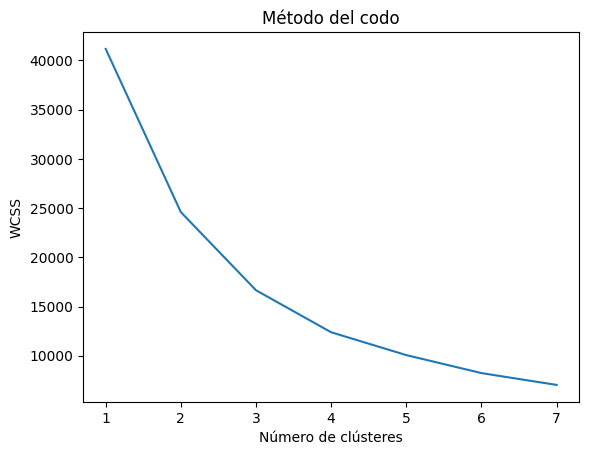

In [19]:
wcss = [] # valores de WCSS
lista_num_cluster = range(1, 8) # Número de clústeres
# Por cada número de clústeres
for i in lista_num_cluster:
    kmeans = KMeans(n_clusters=i, random_state=123) # Definir el modelo
    kmeans.fit(scaled_features) # entrenar el modelo
    value_wcss= kmeans.inertia_ # extraer el WCSS del modelo
    wcss.append(value_wcss) # Añadir a la lista
# Gráficar resultados
plt.plot(lista_num_cluster, wcss)
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()

Aplicación del Método Silueta, con su respectivo gráfico.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



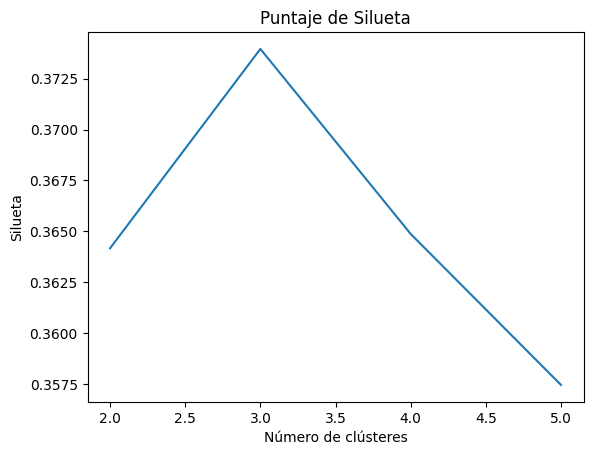

In [24]:
silueta = [] # valores de puntuación de silueta
lista_num_cluster = range(2, 6) # Número de clústeres
# Por cada número de clústeres
for i in lista_num_cluster:
    kmeans = KMeans(n_clusters=i, random_state=123) # Definir el modelo
    kmeans.fit(scaled_features) # entrenar el modelo
    score_slueta= silhouette_score(scaled_features,  kmeans.labels_)  # Calcular el score
    silueta.append(score_slueta) # Añadir a la lista
# Gráficar resultados
plt.plot(lista_num_cluster, silueta)
plt.title('Puntaje de Silueta')
plt.xlabel('Número de clústeres')
plt.ylabel('Silueta')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3,  random_state=123) # Definir el algoritmo
kmeans.fit(scaled_features)  # Entrenar el modelo
datosli["cluster"] = kmeans.labels_ # Obtener las etiquetas
datosli["cluster"] = datosli["cluster"].astype(str) # Convertir a categoria

fig = px.scatter_mapbox(datosli, lat="latitud", lon="longitud", color="cluster")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-25-e07f509115b3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-e07f509115b3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Análisis de los Datos

**¿Cuál es el número de clústeres que determina y por qué?**

Después de haber analizado los gráficos del método del codo y puntaje de silueta, se concluye que el número óptimo de clústeres es tres. En el método del codo se busca que ya no exista un decaimiento significativo, lo cual está entre tres y cuatro.

Por otro lado, en el método de silueta, muestra que el valor más alto se obtiene con tres clústeres.
Ya que ambos métodos coinciden en que tres es un número óptimo, se decide utilizar tres clústeres.


**¿Qué diferencias observa con respecto a los resultados obtenidos en la clase?**

En la clase, aunque llegamos al mismo número de clústeres, observamos diferencias en la distribución de los datos.

En los resultados obtenidos en clase, los clústeres están más desordenados y con una distribución mucho más dispersa tanto en Medellín y sus alrededores.

Los clústeres ahora se encuentran más organizados y se contraen principalmente en la ciudad de Medellín, diferencia que puede verse gracias a la limpieza y el procesamiento en los datos.


**¿Fue relevante la limpieza de los datos para abordar el problema?**

Sí, al tener los datos mucho más limpios, están más focalizados tanto en la ciudad, como en las comunas. Esto permitió una mejor identificación y relevancia de los accidentes con muertos y heridos, lo que facilita una mejor distribución en la ubicación de las ambulancias.

